Image Load


EasyOCR + drawline

In [1]:
# Use EasyOCR
# pdf를 바로 읽을 수 없음 
# convert_from_path : PDF의 각 페이지가 PIL 이미지 객체로 변환되어 리스트에 담겨 나온다
from pdf2image import convert_from_path
import numpy as np
import easyocr
import matplotlib.pyplot as plt

# pdf -> image
pages = convert_from_path('./Image_AI_1.pdf', dpi=300)

reader = easyocr.Reader(['ko', 'en'])

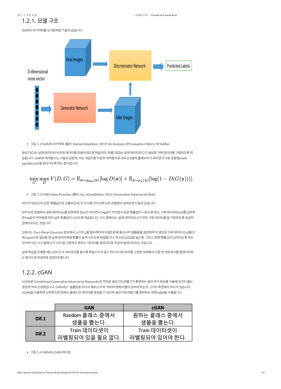

In [2]:
# 2페이지 이미지+텍스트 출력
PIL_image = pages[1]
plt.imshow(PIL_image)
plt.axis('off')
plt.show()

In [3]:
# OCR 수행
# result : bbox, text, prob
result = reader.readtext(np.array(PIL_image))
print(f"Page{1} 결과:\n")

# 5번째 박스까지만 
for idx, (bbox, text, prob) in enumerate(result[:5]):
    if idx == 0:    
        print("bbox\n")
        print(f"{bbox}\n")
    elif idx == 1:  
        print("text\n")
        print(f"{text}\n")
    else:   
        print("prob\n")
        print(f"{prob}\n")
        

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/torch/utils/data/dataloader.py:683: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Page1 결과:

bbox

[[np.int32(93), np.int32(59)], [np.int32(371), np.int32(59)], [np.int32(371), np.int32(99)], [np.int32(93), np.int32(99)]]

text

1.GAN 소개

prob

0.6347136389664059

prob

0.9096482900505103

prob

0.5959996571055686



[INFO] 0.8740: 25.7.7. 오후 11:53
[INFO] 0.9992: 1.GAN 소개
[INFO] 0.6347: PseudoLab Tutorial Book
[INFO] 0.9096: 1.2.1. 모델 구조
[INFO] 0.5960: GAN의 아키택처지 도식화하면 다음과 같습니다:
[INFO] 0.8577: Reallmages
[INFO] 0.8264: Discriminator Network
[INFO] 0.6487: Predicted Labels
[INFO] 0.7470: D-dimensional
[INFO] 0.9543: noise Vector
[INFO] 0.9996: Generator Network
[INFO] 0.8899: Fake Images
[INFO] 0.6765: 그림 1-2 GAN의 아키택처 (출처: Hamed Alqahtani. 2019.An Analysis Of Evaluation Metric Of GANs)
[INFO] 0.2152: 생성기(G눈 실제 데이터와 비슷한 데이터들 만들어내도록 학습되며 , 판별기(D는 실제 데이터와 G가 생성한 가짜 데이터들 구별하도록 학
[INFO] 0.2551: 습월니다: GAN의 목적함수는 다음과 같은데 이논 게임이론 타입의 목적함수로 G와 D 2명의 플레이어가 싸우면서 서로 균형점(nash
[INFO] 0.5052: equilibrium)올 찾아가도록 하는 방식입니다:
[INFO] 0.9299: min max
[INFO] 0.9843: V(D,G)
[INFO] 0.9998: =
[INFO] 0.5446: (a)[log D(a)] +
[INFO] 0.3365: (z)[log(1 - D(G(z)))]:
[INFO] 0.9999: D
[INFO] 0.5459: 그림 1-3 GAN Value Function (출처: lan JGoodfellow. 2014. Generative Adversarial Nets)
[INFO] 0.3832: 여기서 V(DG)의 값은 확출값으로 도출되논데, 이 수식올 각각

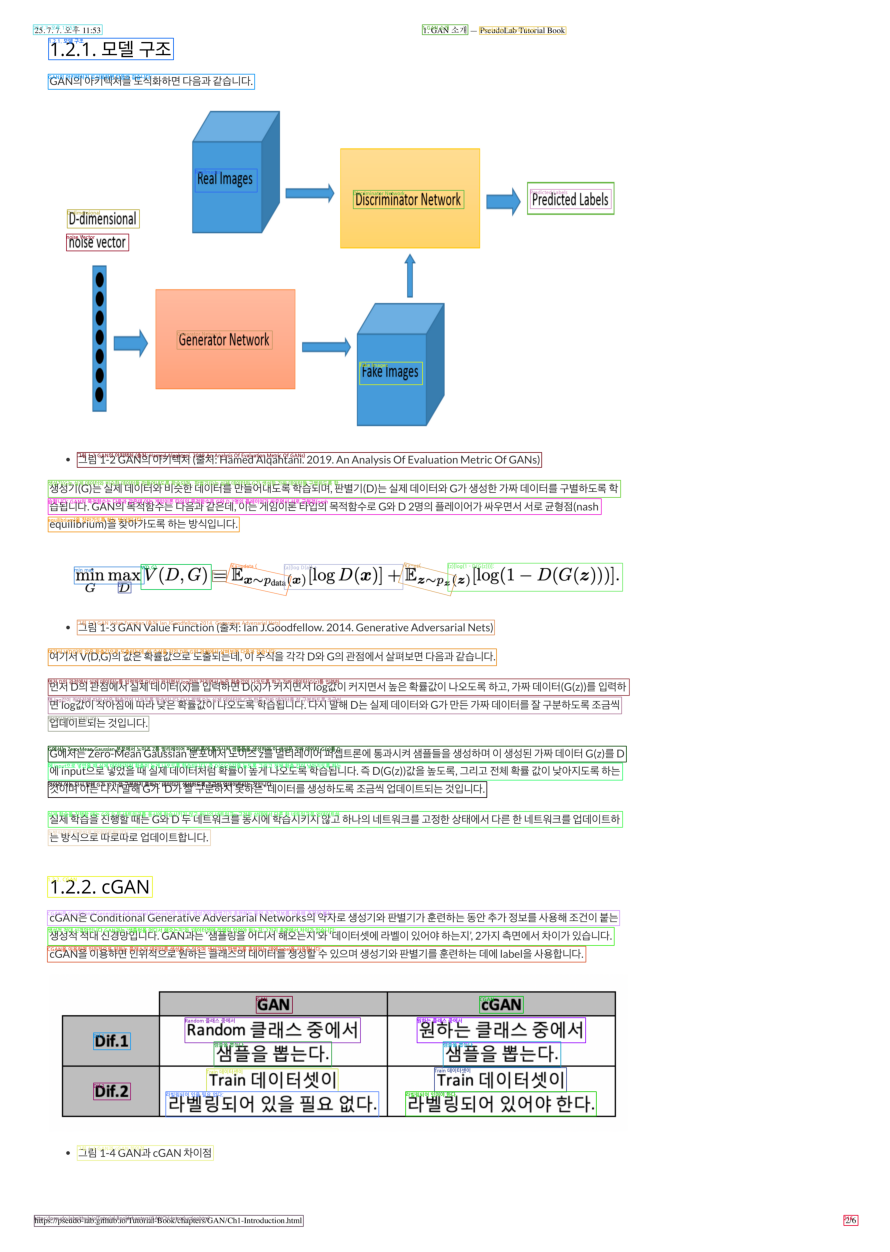

In [ ]:
from PIL import ImageFont, ImageDraw, Image
from matplotlib import font_manager

draw = ImageDraw.Draw(PIL_image)
font = ImageFont.truetype('NanumGothicBold.ttf', 40)

# 박스 색상 지정
np.random.seed(42)
COLORS = np.random.randint(0, 255, size=(255, 3), dtype='uint8')

# OCR 시각화
for i, (bbox, text, prob) in enumerate(result):
    print("[INFO] {:.4f}: {}".format(prob, text))
    color = tuple(map(int, COLORS[i]))

    pts = [tuple(map(int, point)) for point in bbox]
    draw.line(pts + [pts[0]], width=3, fill=color) 
    draw.text(pts[0], text, font=font, fill=color)    # 한국어 텍스트 표시 

plt.figure(figsize=(12, 16))
plt.imshow(pages[1])
plt.axis('off')
plt.show()

Tesseract OCR

In [ ]:
import pytesseract
import cv2
import matplotlib.pyplot as plt

opencv_image = np.array(PIL_image)  # PIL_image는 convert_from_path에서 온 이미지
opencv_image = cv2.cvtColor(opencv_image, cv2.COLOR_RGB2BGR)  # 색상 변환 (선택적)

# OCR (BGR 또는 RGB 상관없음, 정확도는 RGB가 일반적으로 더 나음)
text = pytesseract.image_to_string(opencv_image, lang='kor+eng')

print(text)

Python(25820) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
